<a href="https://colab.research.google.com/github/GoKuKo/WorkFromColab/blob/master/EgyptianCubeRodUsingGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
lines = []
while True:
    line = input()
    if line:
        lines.append(line)
    else:
        break
a=pd.DataFrame(lines)
a[[0,1]] = a[0].str.split(" ",expand=True,)


1 2
2 3
1 3



In [0]:
out=0

In [0]:
def rod(a):
    for i in range(a.shape[0]):
        x,y=a.iloc[i,]
        b=a.drop(a.index[i])
        bool1 = b.isin([x])
        bool2 = b.isin([y])
        if sum(bool1)>0 and sum(bool2)>0:
            global out
            out=out+1
            a=a.drop(a.index[i])
            rod(a)
            return out

In [0]:
rod(a)

3

In [0]:
out

3

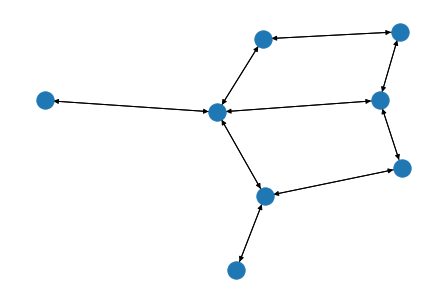

4


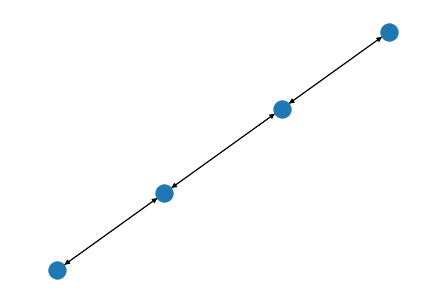

1


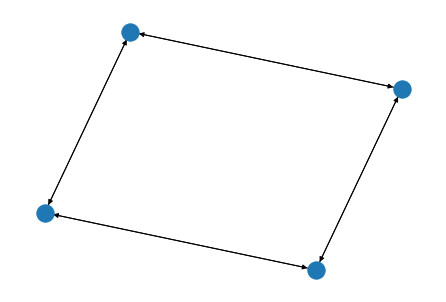

1


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def remove_supersets(sets):
    sets = sorted(map(set, sets), key=len)
    minimal_subsets = []
    for s in sets:
        if not any(minimal_subset.issubset(s) for minimal_subset in minimal_subsets):
            minimal_subsets.append(s)
    return minimal_subsets

def maxRods(k) :
    singleRodSystem = list(set(tuple(sorted(i)) for i in k))
    g = nx.Graph()
    # add nodes inorder to see the name of each node.
    g.add_edges_from(singleRodSystem)
    dg = nx.DiGraph(g)
    nx.draw(dg)
    plt.show()
    all_sets = set(tuple(sorted(l)) for l in list(nx.simple_cycles(dg)) if len(l)>2)
    # Above all_sets contains all possible cycles in the graph but below step removes only supersets and gives subsets
    required_sets = remove_supersets(all_sets)
    no_of_cycles = len(required_sets)
    double_rods = len(k)- len(singleRodSystem)
    return no_of_cycles + double_rods

print(maxRods([[42,35],[20,35],[35,20],[42,10],[10,42],[10,20],[20,45], [20,95],[95,37],[73,95],[35,73]]))
print(maxRods([[42,35],[20,35],[35,20],[42,10]]))
print(maxRods([[1,2],[2,3],[3,4],[4,1]]))
